<a href="https://colab.research.google.com/github/jakubhorvath/VariousMLNotebooks/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! cd ~/.kaggle/

In [ ]:
! kaggle datasets download manoj91298/body-fat-prediction

404 - Not Found


In [ ]:
! kaggle kernels output manoj91298/body-fat-prediction -p /content

Kernel log downloaded to /content/body-fat-prediction.log 


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/StatisticsProject/bodyfat.csv")
data.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


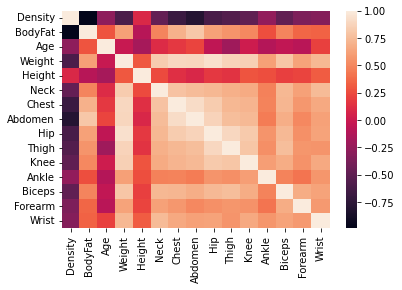

In [ ]:
import seaborn
seaborn.heatmap(data.corr())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.loc[:, ~data.columns.isin(['BodyFat'])]
y = data["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
LR = LinearRegression().fit(X_train, y_train)

LR.fit(X_train, y_train)

LR.score(X_test, y_test)

0.9934391116767123

<Figure size 2400x1600 with 0 Axes>

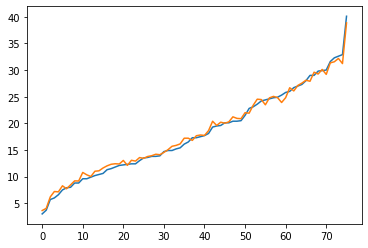

<Figure size 2400x1600 with 0 Axes>

In [ ]:

from seaborn import lineplot
from matplotlib.pyplot import plot, figure
df = pd.DataFrame({"Actual":y_test, "Predicted": LR.predict(X_test)})
df = df.sort_values(by="Actual")
plot((df["Actual"].to_numpy()))
plot(df["Predicted"].to_numpy())
figure(figsize=(30,20), dpi=80)

In [ ]:
d = data[(data["Insulin"] != 0) & (data["SkinThickness"] != 0)]
d.corr()["Insulin"].sort_values()
#len(data[(data["Insulin"] == 0) & (data["SkinThickness"] == 0)])

Pregnancies                 0.082171
BloodPressure               0.098272
DiabetesPedigreeFunction    0.130395
SkinThickness               0.184888
Age                         0.220261
BMI                         0.228328
Outcome                     0.303454
Glucose                     0.580010
Insulin                     1.000000
Name: Insulin, dtype: float64

5
0


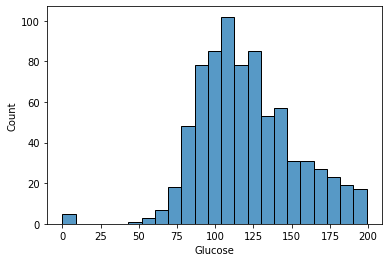

In [ ]:
from seaborn import histplot
print(len(data[data["Glucose"] == 0]))
histplot(data["Glucose"])
data["Glucose"] = data["Glucose"].replace(to_replace=0, value=data["Glucose"].mean())
print(len(data[data["Glucose"] == 0]))

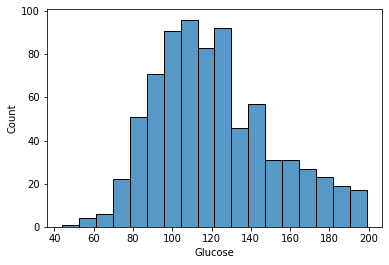

In [ ]:
histplot(data["Glucose"])

In [ ]:
print(len(data[data["Age"] == 0]))

0


11


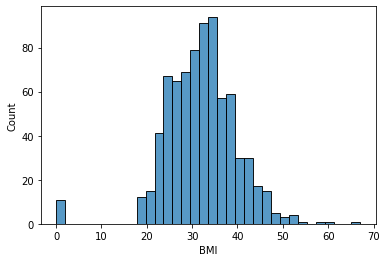

In [ ]:
from seaborn import histplot
print(len(data[data["BMI"] == 0]))
histplot(data["BMI"])
data["BMI"] = data["BMI"].replace(to_replace=0, value=data["BMI"].mean())


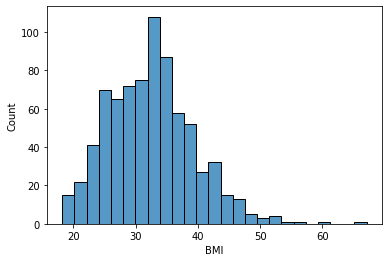

In [ ]:
histplot(data["BMI"])

35


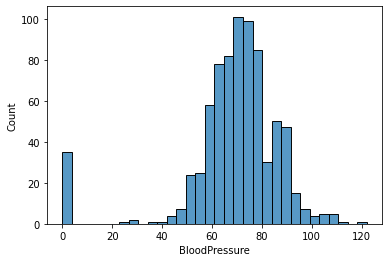

In [ ]:
from seaborn import histplot
print(len(data[data["BloodPressure"] == 0]))
histplot(data["BloodPressure"])
data["BloodPressure"] = data["BloodPressure"].replace(to_replace=0, value=data["BloodPressure"].mean())


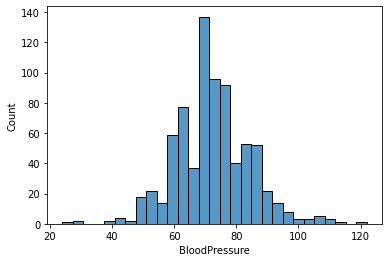

In [ ]:
histplot(data["BloodPressure"])

0


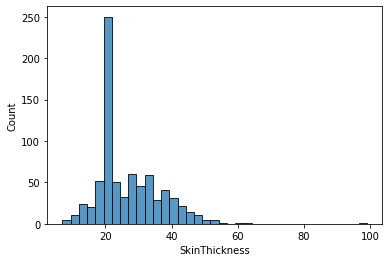

In [ ]:
print(len(data[data["BloodPressure"] == 0]))
histplot(data["SkinThickness"].replace(to_replace=0, value=data["SkinThickness"].mean()) )

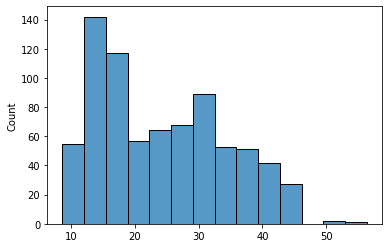

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

def replace_in_df(model, value):
  if value == 0:
    return model.predict([value])[0]
  else:
    return value

d = data[["DiabetesPedigreeFunction","Pregnancies", "Glucose","SkinThickness","Age","BMI","BloodPressure" ]]
d = data[data["SkinThickness"] != 0]
y = d["SkinThickness"]
X = d[["DiabetesPedigreeFunction","Pregnancies", "Glucose","SkinThickness","Age","BMI","BloodPressure" ]]
KNN = KNeighborsRegressor().fit(X, y)
histplot(KNN.predict(X))

skinthick = data["SkinThickness"].to_numpy()
for i in range(len(skinthick)):
  if skinthick[i] == 0:
    vector = data[["DiabetesPedigreeFunction","Pregnancies", "Glucose","SkinThickness","Age","BMI","BloodPressure" ]].to_numpy()[i]
    skinthick[i] = KNN.predict([vector])
    #data["SkinThickness"][i] = KNN.predict([data[["DiabetesPedigreeFunction","Pregnancies", "Glucose","SkinThickness","Age","BMI","BloodPressure" ]].to_numpy()[i]])
data["SkinThickness"] = skinthick
#data["SkinThickness"].replace(to_replace=0, value=)
#data["SkinThickness"] = data[["DiabetesPedigreeFunction","Pregnancies", "Glucose","SkinThickness","Age","BMI","BloodPressure" ]].apply(lambda x: replace_in_df(KNN, x))

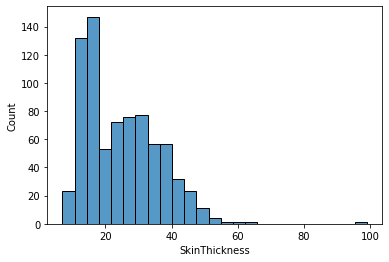

In [ ]:
histplot(data["SkinThickness"])

374


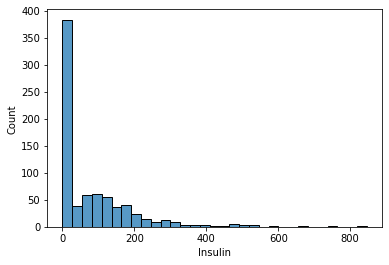

In [ ]:
print(len(data[data["Insulin"] == 0]))
#histplot(data[data["Insulin"] != 0 ]["Insulin"])
histplot(data["Insulin"])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

d = data[["DiabetesPedigreeFunction","Pregnancies", "Glucose","Insulin","Age","BMI","BloodPressure", " " ]]
d = data[data["SkinThickness"] != 0]
y = d["SkinThickness"]
X = d[["DiabetesPedigreeFunction","Pregnancies", "Glucose","Insulin","Age","BMI","BloodPressure" ]]
KNN = KNeighborsRegressor().fit(X, y)
histplot(KNN.predict(X))

skinthick = data["SkinThickness"].to_numpy()
for i in range(len(skinthick)):
  if skinthick[i] == 0:
    vector = data[["DiabetesPedigreeFunction","Pregnancies", "Glucose","SkinThickness","Age","BMI","BloodPressure" ]].to_numpy()[i]
    skinthick[i] = KNN.predict([vector])
    #data["SkinThickness"][i] = KNN.predict([data[["DiabetesPedigreeFunction","Pregnancies", "Glucose","SkinThickness","Age","BMI","BloodPressure" ]].to_numpy()[i]])
data["SkinThickness"] = skinthick
#data["SkinThickness"].replace(to_replace=0, value=)
#data["SkinThickness"] = data[["DiabetesPedigreeFunction","Pregnancies", "Glucose","SkinThickness","Age","BMI","BloodPressure" ]].apply(lambda x: replace_in_df(KNN, x))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

d = data[["DiabetesPedigreeFunction","Insulin","Pregnancies", "Glucose","Age","BMI","BloodPressure" ]]
d = data[data["Insulin"] != 0]
y = d["Insulin"]
X = d[["DiabetesPedigreeFunction","Pregnancies", "Glucose","Age","BMI","BloodPressure" ]]
KNN = KNeighborsRegressor().fit(X,y)
histplot(KNN.predict(X))


SyntaxError: ignored

In [ ]:
list(KNN.predict(X)).count(0)